# Section 1

In this section I will examine the data and create some plots, to get a visual look at the variables and their relationship with outcome.

### Imports and Data inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder
import csv
    
df = pd.read_csv("customer-data-20210628.csv")   
df.head()


,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,...,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,telematic_score,monthly_mileage
0,569520,65+,female,majority,0-9y,high school,high,0.629027,True,after 2015,...,True,10238,12000.0,sedan,0,0,0,False,37.454012,1000.000000
1,750365,16-25,male,majority,0-9y,none,very low,0.357757,False,before 2015,...,False,10238,16000.0,sedan,0,0,0,True,95.071431,1333.333333
2,199901,16-25,female,majority,0-9y,high school,low,0.493146,True,before 2015,...,False,10238,11000.0,sedan,0,0,0,False,73.199394,916.666667
3,478866,16-25,male,majority,0-9y,university,low,0.206013,True,before 2015,...,True,32765,11000.0,sedan,0,0,0,False,59.865848,916.666667
4,731664,26-39,male,majority,10-19y,none,low,0.388366,True,before 2015,...,False,32765,12000.0,sedan,2,0,1,True,15.601864,1000.000000


In [2]:
df['outcome'].describe()

count     10000
unique        2
top       False
freq       6867
Name: outcome, dtype: object

### 1.1 Proportion

What proportion of customers with a credit score below 0.2 made a claim in the last year?

In [3]:
count = 0
tot = 0

for index, row in df.iterrows():
    if row["credit_score"] < 0.2:
        tot += 1
        if row["outcome"] == True:
            count += 1

proportion = count/tot
print("Total customers with credit score below 0.2: ", tot)
print("The proportion of customers with a credit score below 0.2 who made a claim in the last year: ", proportion)

Total customers with credit score below 0.2:  98
The proportion of customers with a credit score below 0.2 who made a claim in the last year:  0.6020408163265306


### 1.2 Plots

Produce a maximum of 3 plots to help the client understand their data better. Explain what the plots show/any insight they provide the client about their data.

### Function Library

In [4]:
# Transforms variable into categorical with a set number of categories (bins).
def categorise(variable, n_bins, df):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(pd.cut(df[variable], n_bins, retbins=True)[0])
    del df[variable]
    df.insert(0, variable, y)
    
    
# Creates and returns a Hash with the frequency of those who claimed and those who didn't for a variable.
def createFreqHash(varString):
    varHash = {}
    for index, row in df.iterrows():
        var = row[varString]
        if var in varHash.keys():
            if row['outcome'] == True:
                varHash[var]['claim'] += 1
            else:
                varHash[var]['noClaim'] += 1
        else:
            if row['outcome'] == True:
                varHash[var] = {}
                varHash[var]['claim'] = 1
                varHash[var]['noClaim'] = 0
            else:
                varHash[var] = {}
                varHash[var]['claim'] = 0
                varHash[var]['noClaim'] = 1 
    
    return varHash


# Creates and shows a double barchart for one variable grouped by outcome.
def claimDoubleBarchart(xlabels, xAxis, title, varHash):
    claim = []
    noClaim = []
    for i in xlabels:
        claim.append(varHash[i]['claim'])
        noClaim.append(varHash[i]['noClaim'])

    X_axis = np.arange(len(xlabels))
    plt.bar(X_axis - 0.2, noClaim, 0.4, label = 'No Claim', color = 'blue')
    plt.bar(X_axis + 0.2, claim, 0.4, label = 'Claim', color = 'red')

    plt.xlabel(xAxis)
    plt.ylabel("Number of Claims")
    plt.title(title)
    plt.legend()
    plt.show()

    
# Creates and shows a Marimekko plot for one variable grouped by outcome.    
def claimMarimekko(xlabels,title, varHash):
    x = []
    y = []

    for i in xlabels:
        total = varHash[i]['claim'] + varHash[i]['noClaim']
        x.append(total)
        y.append(varHash[i]['claim'] / total)    

    fig, ax = plt.subplots(1)
    width = [i/sum(x) for i in x]

    adjusted_x, temp = [0], 0
    for i in width[:-1]:
        temp += i
        adjusted_x.append(temp)

    plt.bar(adjusted_x, y, width=width, align = 'edge', edgecolor ='black', color = 'red')
    plt.bar(adjusted_x, np.ones(len(y))-y, bottom = y, width = width,
            align = 'edge', edgecolor = 'black', color = 'blue')

    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
    plt.ylim(0,1)
    plt.xlim(0,1)

    axy = ax.twiny()
    axy.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
    axy.set_xticklabels(xlabels, fontsize=10)
    
    red = mpatches.Patch(color='red', label='Claim')
    blue = mpatches.Patch(color='blue', label='No Claim')
    plt.legend(handles=[red, blue])
    plt.title(title)
    plt.show()
    

I have chosen three plots demonstrating how features of a customer relate to whether or not a claim was made. These demonstrate that client features are important and indicate that formal modelling will be useful for these variables and others not shown here. Indeed, the formal model shown in Section 2 identifies that Credit score is not a particularly important variable despite its relationship to making a claim in this graph, showing that these plots can be useful but are not the full picture.

#### Plot 1

The below plot demonstrates the relationship between annual mileage and outcome by grouping mileage into small distinct ranges and plotting a histogram of their frequencies, for those who made a claim and those who didnt. 

The plot clearly shows distinctly different peaks for the claim groups and non claim groups leading to the conclusion that those who made a claim in general have a higher annual mileage. It also demonstrates the prevelance of those who claimed is lower for the entire dataset. It is important to note that this correlation does not necessarily mean high annual milege is the cause of this group claiming more, but it definitely does warrant further investigation. 

Any of the variables can be viewed in this way and it is a useful method to visually assess the variables' correlation with claims. If you plot this for different variables you will see differing levels of correlation. 

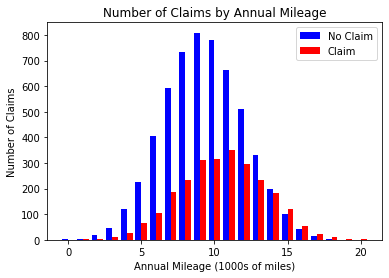

In [5]:
df = df.dropna()
categorise('annual_mileage', 21, df) 
mileHash = createFreqHash('annual_mileage')
xlabels = [i for i in range(21)]
claimDoubleBarchart(xlabels, 'Annual Mileage (1000s of miles)', 'Number of Claims by Annual Mileage', mileHash)

#### Plot 2

This boxplot tests the different quartiles of credit score for two groups, those who made a claim and those who didn't. Similarly to Plot 1, it demonstrates a difference in median value for the two groups which suggests a correlation between credit score and claims. Additionally however this plot shows the size of the quartiles for each group. The box in the centre demonstrates the size of the second and third quartiles while the line segments outside the box demonstrate the size of the first and fourth quartiles, while the far reaching dots represent outliers. 

This visualisation is useful as the size of the quartiles can tell you information about a category, if the box was quite narrow it would suggest a lot of values are clumped around the mean suggesting the significance of that category. Alternatively as in this example you can see that one side of the box is larger than the other. This suggests these distributions have longer tails on one side, which can also be useful information when analysing your data.

Any continuous or interval data can be visualised in this way, and different categories will display different shapes.

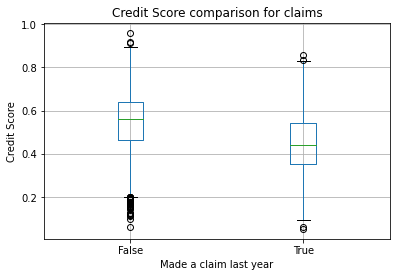

In [6]:
boxplot = df.boxplot(column=['credit_score'], by=['outcome'])
plt.suptitle("")
boxplot.set_xlabel("Made a claim last year")
boxplot.set_ylabel("Credit Score")
boxplot.set_title("Credit Score comparison for claims")
plt.show()

#### Plot 3 

This is a Marimekko plot showing the proportions of each category of driving experience who made a claim. This plot demonstrates that customers with 0-9 years of driving experience are significantly more likely to make a claim than the other categories, and claim likelihood decreases as the number of years driving increases. The width of each category represents the proportion of the total data who fit in that category.

This plot is useful as not only does it show a clear relationship between driving experience and claims but it also shows how important that category can be as a variable and for your business with its width. In this example we can see that not only are the highest claim proportions in the first two categories, but also those two categories make up close to 70% of your customer base. Meaning this is a variable you should definitely pay attention to. 

Any categorical variable can be viewed in this way, and continuous variables can two with a transformation into distinct categories.

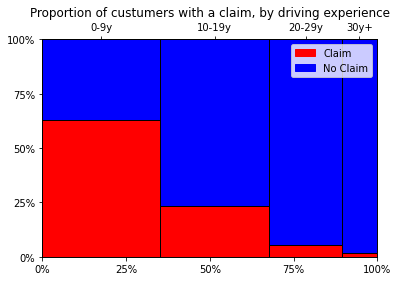

In [7]:
expHash = createFreqHash('driving_experience')
xlabels = ['0-9y', '10-19y', '20-29y', '30y+']
claimMarimekko(xlabels, "Proportion of custumers with a claim, by driving experience", expHash)

# Section 2

In this section I will create a logistic regression model to predict the likelihood of a claim being made given the data shared with me. I will evaluate and refine it before making data recommendations to the client

### Imports

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
import math
from scipy.stats import sem
from scipy import mean

### Function Library

In [9]:
# Transforms variable into categorical with a set number of categories (bins).
def categorise(variable, n_bins, df):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(pd.cut(df[variable], n_bins, retbins=True)[0])
    del df[variable]
    df.insert(0, variable, y)

    
# Creates Logistic regression model from the training data after preparation
# Returns the model itself and prints a table of each feature with its -
# -  coefficient, p-val, mean coefficient, std. error, z value and relative odds.
def createModel(X,Y):
    M = []
    S = []
    mu = []
    std = []
    
    for i in range(100,-1,-1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = i)
        model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
        model.fit(X_train, Y_train)
        
        M.append(model.coef_[0].tolist())
     
    scores, pvalues = chi2(X_train, Y_train)

    for i in range(len(X_train.columns)):
        temp = []
        for j in range(len(M)):
            temp.append(M[j][i])
        S.append(temp)

    for i in range(len(X_train.columns)):
        mu.append(np.mean(S[i]))
        std.append(sem(S[i]))

    z_score = []
    for i in range(len(X_train.columns)):
        z_score.append(abs(mu[i]/std[i]))    
    
    Yhat = [model.intercept_[0] + mu[i] for i in range(len(X_train.columns))]
    odds = [math.exp(Yhat[i])/(1 + math.exp(Yhat[i])) for i in range(len(X_train.columns))]
    prop = math.exp(model.intercept_[0])/(1 + math.exp(model.intercept_[0]))
    relOdds = [100*(odds[i] - prop) for i in range(len(odds))]
    
    pvals = {'Features':X_train.columns, 'Coefs.':model.coef_[0], 'p-values':pvalues, 
             'Mean Coefs.':mu, 'Std. Error':std, 
             'Z Value':z_score, 'Relative Odds':relOdds }
    df_pvals = pd.DataFrame(pvals)
    
    cont = ['credit_score','speeding_violations','telematic_score','DUIs']
    for index, row in df_pvals.iterrows():
        if row['Features'] in cont:
            df_pvals.at[index,'Relative Odds'] = 0
    
    sorted_df = df_pvals.sort_values(by = ['Features','p-values']).reset_index(drop = True)
    print('Intercept:  ', model.intercept_[0])
    with pd.option_context('expand_frame_repr', False, 'display.max_rows', None, 
                           'display.max_columns', None, 'display.precision', 5,):
        print(sorted_df)
        
    return model, sorted_df


# Prints a number of evaluative metrics for any given model based on the test data.
def evaluateModel(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred_prob = model.predict_proba(X_test)
    
    CM = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    print(CM, '\n')
    
    TPR = CM[1][1]/(CM[1][1] + CM[0][1])
    TNR = CM[0][0]/(CM[0][0] + CM[1][0])
    FPR = CM[1][0]/(CM[0][0] + CM[1][0])
    FNR = CM[0][1]/(CM[1][1] + CM[0][1])
    
    print('True Positive Rate: {:.2f}'.format(TPR))
    print('True Negative Rate: {:.2f}'.format(TNR))
    print('False Positive Rate: {:.2f}'.format(FPR))
    print('False Negative Rate: {:.2f}'.format(FNR), '\n')
    
    print('Overall Accuracy: {:.4f}'.format(model.score(X_test, Y_test)), '\n')
    print(classification_report(Y_test, Y_pred))
    
    print('Log Loss: {:.4f}'.format(log_loss(Y_test, Y_pred_prob)), '\n')
    
    print('ROC Curve:')
    plot_roc_curve(model, X_test, Y_test)

    
# Creates Interaction terms between any two variables (continuous or categorical).
# Returns a data frame with all the relevant interaction terms.
def getInteractionTerm(variables, df):
    df1 = df[variables]
    dummies = []
    continuous = ['telematic_score', 'credit_score']
    for var in variables:
        if var not in continuous:
            dummies.append(var)
    
    X = pd.get_dummies(df1, columns = dummies)
    
    poly = PolynomialFeatures(interaction_only = True, include_bias = False)
    interaction = poly.fit_transform(X)
    names = poly.get_feature_names(X.columns)
    for name in names:
        name = name.replace(" ", ":")
    
    interactionTerms = pd.DataFrame(interaction, columns = names)
    for column in interactionTerms.columns[(interactionTerms == 0).all()]:
        del interactionTerms[column]
        
    return interactionTerms


# Creates squared terms for two variable 
# Returns data frame with squared terms and interaction terms as an aside. 
def getSquaredTerms(variables, df):
    df1 = df[variables]
    
    poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
    squared = poly.fit_transform(df1)
    #print(squared)
    names = poly.get_feature_names(df1.columns)
    
    squaredTerm = pd.DataFrame(squared, columns = names)
    
    return squaredTerm


# Investigates the importance of missing data in the data set
# Returns the proportion of customers with a claim for missing data and for not. 
def checkMissingData(variable):
    missingClaim = 0
    missing = 0
    notMissingclaim = 0
    for index, row in df.iterrows():

        if pd.isnull(row[variable]):
            missing += 1
            if row["outcome"] == True:
                missingClaim += 1
        else:
            if row["outcome"] == True:
                notMissingclaim += 1

    missProp = missingClaim/missing
    notMissProp = notMissingclaim/(len(df)-missing)
    print(variable,'missing data claim difference.')
    print('Missing data claim proportion: {:.4f}'.format(missProp))
    print('Not missing claim proportion: {:.4f}'.format(notMissProp))
    print('Percentage difference: {:.4f}'.format((missProp-notMissProp)*100,),'%', '\n')


### 2.1 Data Preprocessing

Perform any necessary data preprocessing in order to build a model. Briefly discuss any assumptions
being made about the data and explain any preprocessing decisions.

After initially loading the data, I removed the 'id' and 'monthly_mileage' columns.

The 'id' variable should be removed as IDs are randomly assigned and will have no predictive power. The 'monthly_mileage' variable shoulld be removed as the data already contains 'annual_mileage'. The two variables are a linear transformation of each other and thus are co-linear. 

In [10]:
df = pd.read_csv("customer-data-20210628.csv")
df.drop(df.columns[[0,20]], axis = 1, inplace = True)
print(df.columns)

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome',
       'telematic_score'],
      dtype='object')


'credit_score' and 'annual_mileage' are the two variables with missing data. As shown below the difference in claim proportion for credit score between missing and normal data is very small. As such and because the dataset is sufficiently large to create a model, it is approproate to simply drop these data from the analysis instead of assigning a value.

As for 'annual_mileage' the difference between missing and normal data for claim proportion is much larger. This does not mean it is necessarily a statistically significant factor, but certainly warrants further investigation. Thus to handle the missing data, annual mileage will be transformed into a categorical varriable with missing as one of the categories.

In [11]:
checkMissingData('credit_score')
checkMissingData('annual_mileage')

credit_score missing data claim difference.
Missing data claim proportion: 0.3096
Not missing claim proportion: 0.3137
Percentage difference: -0.4134 % 

annual_mileage missing data claim difference.
Missing data claim proportion: 0.3375
Not missing claim proportion: 0.3107
Percentage difference: 2.6775 % 



The below cell handles all data pre-processing before the model is created. 

1. 'past_accidents' is categorised as well as 'annual_mileage' after initial investigation suggests the relationship with outcome may not be linear.
2. Binary dummy variables for each category are created and then any data with missing values are removed from the dummyData set.
3. Data then split into training (roughly 75%) and testing (roughly 25%) data for model creation and evaluation respectively. 

In [12]:
# Transform 'annual_mileage' and 'past_accidents' into categorical variables
categorise('annual_mileage', 5, df)
categorise('past_accidents', 4, df)

# Creates a set of binary dummy variables for each category of every boolean or categorical variable. 
dummyData = pd.get_dummies(df, columns =['age', 'gender', 'race', 'driving_experience', 'annual_mileage',
                                         'education', 'income', 'vehicle_ownership', 'vehicle_year', 'married', 
                                         'children', 'postal_code','past_accidents',
                                          'vehicle_type'],dummy_na = False,  drop_first=True)

# Removes any dummy variable with no occurences in the data.
for column in dummyData.columns[(dummyData == 0).all()]:
    del dummyData[column]

# Drops any columns with missing data, at this point only those missing values from 'credit_score'.
dummyData = dummyData.dropna()

# Splits data into X and Y and then splits again into training data and testing data.  
X = dummyData.drop(['outcome'], axis = 1)
Y = dummyData['outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

### 2.2 Model

Select and fit one proof of concept model to predict the outcome column from the customer data. State the reasons for the choice of model. 

Since the outcome variable is a boolean or binary variable, a classification model is required to predict the likelihood of True or False. Hence I have used a Logistic Regression, as it predicts the probability of one outcome or another and can also act as a classifier. As well as this the coefficient and p-value of each individual variable is displayable which is useful in these circumstances as a company would want to know which factors are most important.

Notes on the model:

The below cell presents the full model created. The intercept, along with every categorical and continuous variable assesed with Coefficient and p-value. Also included are the results of a bootstrap method, repeatedly creating a model 100 times and taking the mean of all Coefficients, and calculating their Standard Error and resulting Z Value. Z value here is defined as mean coefficient / standard error, testing the null hypothesis that a variable has no effect on outcome.

Logistic Regressions are inherently unstable due to their iterative nature. Hence the coefficients given in the initial model are not always representative. The bootstrap method allows us to see which coefficients are more or less reliable and how far they are from 0. One example of that instability can be seen here where this particular iteration of the model suggests DUIs has a highly significant negative coefficient when it's mean value is positive and the low Z value re-confirms this coefficient's lack of reliability.

Relative Odds refers to the percentage difference in likelihood of making a claim in comparison to the intercept or reference categories. The values for continuous or ordinal data are 0 in this column as this is not an appropriate measure for non-categorical variables.

In [13]:
model, sorted_df = createModel(X, Y)

Intercept:   -0.5631851495153195
                     Features   Coefs.      p-values  Mean Coefs.  Std. Error    Z Value  Relative Odds
0                        DUIs -0.03541   9.31621e-74      0.00542     0.00517    1.04813        0.00000
1                   age_26-39 -0.19768   7.45967e-03     -0.12799     0.00652   19.62942       -2.90400
2                   age_40-64 -0.31211   4.13282e-52     -0.18417     0.00696   26.44933       -4.14122
3                     age_65+ -0.24321   2.61884e-65     -0.15868     0.00864   18.36910       -3.58284
4            annual_mileage_1  0.14758   4.19338e-15      0.08603     0.00927    9.28266        2.01126
5            annual_mileage_2  0.46370   8.64512e-01      0.39935     0.00936   42.66974        9.63225
6            annual_mileage_3  0.80802   2.35938e-27      0.78454     0.01110   70.65129       19.23020
7            annual_mileage_4  1.86206   1.01192e-05      1.81314     0.02021   89.72975       41.44816
8            annual_mileage_5  

### 2.3.1 Model Evaluation

Validate your model using appropriate metrics, explain the choice of metric and state how you would expect it to perform on the rest of the client’s data.

The below cell presents a number of evaluative measures for this baseline model. Given the lower prevalence of outcome = True, we would expect the true positive rate to be lower than the true negative rate. The overall accuracy acheived is good and the log loss is quite low when the prevalence of True value in outcome is taken into account.

Confusion Matrix:
[[1398  146]
 [ 187  524]] 

True Positive Rate: 0.78
True Negative Rate: 0.88
False Positive Rate: 0.12
False Negative Rate: 0.22 

Overall Accuracy: 0.8523 

              precision    recall  f1-score   support

       False       0.88      0.91      0.89      1544
        True       0.78      0.74      0.76       711

    accuracy                           0.85      2255
   macro avg       0.83      0.82      0.83      2255
weighted avg       0.85      0.85      0.85      2255

Log Loss: 0.3243 

ROC Curve:


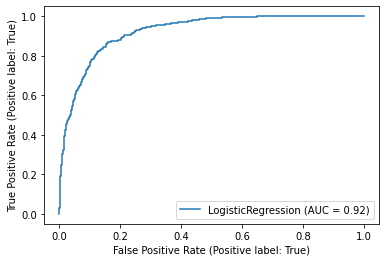

In [14]:
evaluateModel(model, X_test, Y_test)

### 2.3.2 Feature Selection

The model's accuracy is good, but their are many predictors in the model with high p-values and low Z values. In order to find a balance between simplicity and accuracy, I decided to remove variables with low Z scores. 

Becasue the p-values are based off this one version of the model, they do not tell the whole story.The Z values obtained from the mean coefficients in the bootstrap method provide a more complete picture of variable significance if this model were to be reproduced in a different state. 

Since the dataset is artificially generated, it displays much higher regularity than real world data. As such the Z values for each coefficient are artificially higher than real world values as these data exhibit much lower variance than could be expected in the real world. For this reason I have chosen Z < 10 as a cut off, as it removes many insignificant variables, without affecting accuracy significantly. 

Also, even though race has a sufficiently high Z score to remain in the model, this value is most-likely due to race's colinearity with other factors. For this reason I have chosen to remove it from the feature set. I tested the accuracy with and without race and it was marginally higher without race. 

Note: In a real world anaylisis a common value for z would usually be 1.96 or greater. 

In [15]:
# Removes any variable with a Z value below a prescribed level.
for index, row in sorted_df.iterrows():
    if row['Z Value'] < 10:
        del dummyData[row['Features']]

# Manually removing 'race' from the feature set.
del dummyData['race_minority']

# Recreates the dummyData set with the new reduced set of features and splits it for model creation.
X = dummyData.drop(['outcome'], axis = 1)
Y = dummyData['outcome']

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, random_state = 0)

The below cell displays the reduced model. In some cases, like 'vehicle_type' and 'DUIs', entire variables have been found insignificant and removed from the feature set. In other cases, only some categories of a variable have been removed.

In [16]:
model2, sorted_df = createModel(X, Y)

Intercept:   -0.3470959377515235
                     Features   Coefs.     p-values  Mean Coefs.  Std. Error    Z Value  Relative Odds
0                   age_26-39 -0.18175  7.45967e-03     -0.14505     0.00618   23.48357       -3.46991
1                   age_40-64 -0.27814  4.13282e-52     -0.21158     0.00608   34.81621       -5.02321
2                     age_65+ -0.18333  2.61884e-65     -0.18705     0.00725   25.79800       -4.45359
3            annual_mileage_2  0.32496  8.64512e-01      0.31823     0.00469   67.84366        7.86972
4            annual_mileage_3  0.67457  2.35938e-27      0.70481     0.00702  100.36575       17.44012
5            annual_mileage_4  1.74390  1.01192e-05      1.73301     0.01860   93.19646       38.58530
6            annual_mileage_5  0.40395  1.05783e-01      0.34569     0.00614   56.26540        8.55626
7               children_True -0.20143  9.96303e-29     -0.13758     0.00387   35.54277       -3.29391
8   driving_experience_10-19y -1.91417  

As the below evaluation of the model shows, removing these variables had a negligible effect on overall accuracy, while log loss decreased and the model became a lot simpler for interpretation.

Confusion Matrix:
[[1401  143]
 [ 188  523]] 

True Positive Rate: 0.79
True Negative Rate: 0.88
False Positive Rate: 0.12
False Negative Rate: 0.21 

Overall Accuracy: 0.8532 

              precision    recall  f1-score   support

       False       0.88      0.91      0.89      1544
        True       0.79      0.74      0.76       711

    accuracy                           0.85      2255
   macro avg       0.83      0.82      0.83      2255
weighted avg       0.85      0.85      0.85      2255

Log Loss: 0.3233 

ROC Curve:


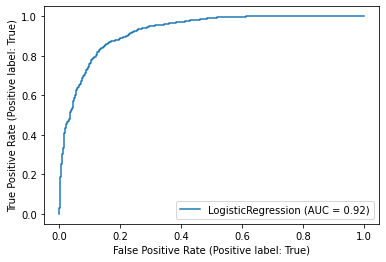

In [17]:
evaluateModel(model2, X_test2, Y_test2)

### 2.3.3 Interaction and Quadratic Testing

These code boxes were used to create and test Interaction terms for any two variables and Quadratic terms of continuous variables. However from the values I tested, no interaction or quadratic term was significant enough to improve accuracy without increasing complexity more.

The below boxes should not be run, they are kept in as an example to demonstrate the testing I conducted.

In [ ]:
# removes na values from credit_score as interaction and quadratic term formulation can't handle them.
'''
df = df.dropna()
'''

In [ ]:
# Creates interaction terms and inserts them into the feature set along -
# - with the single variables if they were previously deleted.
'''
intTerms = getInteractionTerm(['age','gender'], df)
for item in intTerms.columns:
    if item not in dummyData.columns:
        dummyData.insert(0, item, intTerms[item])
'''

In [ ]:
# Creates quadratic terms and inserts them into the feature set along -
# - with the single variables if they were previously deleted.
'''
squaredTerms = getSquaredTerms(['credit_score','DUIs'], df)
for item in squaredTerms.columns:
    if item == 'DUIs^2' or item == 'DUIs':
        dummyData.insert(0, item, squaredTerms[item])
'''

In [ ]:
# Re makes the dummyData X and Y sets after either the quadratic or interaction term has been added.
'''
dummyData = dummyData.dropna()

X = dummyData.drop(['outcome'], axis = 1)
Y = dummyData['outcome']

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, random_state=0)
'''

### 2.3.4 Conclusion

As a result model2 is the final model:

In [18]:
print("Intercept:", model2.intercept_[0])
with pd.option_context('expand_frame_repr', False, 'display.max_rows', None, 
                           'display.max_columns', None, 'display.precision', 5,):
    print(sorted_df)

Intercept: -0.3470959377515235
                     Features   Coefs.     p-values  Mean Coefs.  Std. Error    Z Value  Relative Odds
0                   age_26-39 -0.18175  7.45967e-03     -0.14505     0.00618   23.48357       -3.46991
1                   age_40-64 -0.27814  4.13282e-52     -0.21158     0.00608   34.81621       -5.02321
2                     age_65+ -0.18333  2.61884e-65     -0.18705     0.00725   25.79800       -4.45359
3            annual_mileage_2  0.32496  8.64512e-01      0.31823     0.00469   67.84366        7.86972
4            annual_mileage_3  0.67457  2.35938e-27      0.70481     0.00702  100.36575       17.44012
5            annual_mileage_4  1.74390  1.01192e-05      1.73301     0.01860   93.19646       38.58530
6            annual_mileage_5  0.40395  1.05783e-01      0.34569     0.00614   56.26540        8.55626
7               children_True -0.20143  9.96303e-29     -0.13758     0.00387   35.54277       -3.29391
8   driving_experience_10-19y -1.91417  9.

Given that I split the data into training and testing data and evaluated entirely on the testing data. I believe the model would perform with the same accuracy levels on the rest of the company's data. If the shared data is an accurate and random sample of the data as a whole, there would be no reason to think the model would perform qualitatively differently. 

As stated before the bootstrap method would be more sensitive in real world data and a different Z value cut off would be chosen. 

### 2.4 Recommendations

In light of the above questions the client is keen to know if they have collected the right data for their business needs. Make a maximum of 5 recommendations to the client for future data collection.

1. I increased the Z value cut off to 50 to see how the model would do and as the evaluation below shows, the accuracy is still high. In general I would not recommend considering a Z value so high as 50, it is an extremely rigorous cut off and would almost never be used as a viable option for a real world model as it takes away too much information  For this reason, this experiment does not show that the deleted factors are un-informative, however it does suggest that the vast majority of predictive power lies within the variables displayed in the model3 below. My recommendation around this observation would be in general to pay most attention to these variables when collecting data, while still understanding that the deleted factors from model2 still can be important for many individual cases.

In [19]:
# Removes any variable with a Z value above a prescribed level.
for index, row in sorted_df.iterrows():
    if row['Z Value'] < 50:
        del dummyData[row['Features']]

# Recreates the dummyData set with the new reduced set of features and splits it for model creation.
X = dummyData.drop(['outcome'], axis = 1)
Y = dummyData['outcome']

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, random_state = 0)

In [20]:
model3, sorted_df = createModel(X, Y)

Intercept:   -0.72836930015535
                     Features   Coefs.     p-values  Mean Coefs.  Std. Error    Z Value  Relative Odds
0            annual_mileage_2  0.39059  8.64512e-01      0.37222     0.00470   79.17490        8.63392
1            annual_mileage_3  0.82855  2.35938e-27      0.82495     0.00684  120.57204       19.85726
2            annual_mileage_4  1.89761  1.01192e-05      1.87196     0.01828  102.38766       43.27864
3            annual_mileage_5  0.46885  1.05783e-01      0.40050     0.00632   63.39511        9.32066
4   driving_experience_10-19y -2.05034  9.46016e-14     -2.06404     0.00355  581.64990      -26.78172
5   driving_experience_20-29y -3.81261  5.89381e-98     -3.93325     0.00756  520.20941      -31.61900
6     driving_experience_30y+ -4.46612  1.77562e-66     -4.38280     0.01054  415.86359      -31.95598
7                 gender_male  0.98580  8.77407e-09      0.98037     0.00378  259.26441       23.71166
8                married_True -0.49723  3.

Confusion Matrix:
[[1399  145]
 [ 181  530]] 

True Positive Rate: 0.79
True Negative Rate: 0.89
False Positive Rate: 0.11
False Negative Rate: 0.21 

Overall Accuracy: 0.8554 

              precision    recall  f1-score   support

       False       0.89      0.91      0.90      1544
        True       0.79      0.75      0.76       711

    accuracy                           0.86      2255
   macro avg       0.84      0.83      0.83      2255
weighted avg       0.85      0.86      0.85      2255

Log Loss: 0.3218 

ROC Curve:


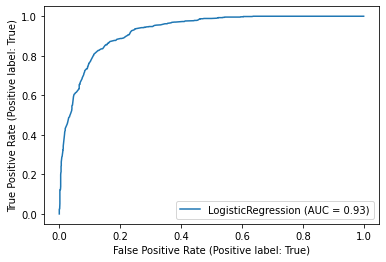

In [21]:
evaluateModel(model3, X_test3, Y_test3)

2. Driving experience, vehicle year, age and income were all collected categorically. In each case there is no justification for the separation points of each category and they all seem quite arbitrary. Moreover in the case of income, the separation points are not even given, only a qualitative measure (low, medium, high, etc) is provided. It would be preferable to collect this data continuously. If each of these variables were continuous we could make our own decision as to whether to categorise them or not, and if so what the best cut offs for modelling would be. Additionally leaving them as continuous would simplify the model with fewer variables. All of these variables are significant predictors to some degree and being able to evaluate them more fully would certainly improve the model

3. Vehicle type seems to be close to irrelevant. This variable is heavily skewed with over 95% of the dataset having a sedan. Given that the alternative (sports car) seemed to be insignificant, this category is not helping with prediction, although I can imagine it might be needed for correct pricing. I would recommend either increasing the number of vehicle types (e.g 4x4, hatchback, etc.) to test if other types of car are significant, or change this factor to something else entirely (e.g vehicle make).

4. There is no data in the set on employment. Whether someone is employed or not, what job they have, do they drive for a living could all be relevant factors. You could imagine a rideshare driver, driving long hours in big cities could have a higher chance of making a claim. I would recommend creating a job category variable with different types of job as the values. Each separate job could not be its own factor, there would be too many distinct values. Unemployed should be its own factor within the job variable.

5. Logistic regression tests a variable's effect after other factors are taken into account. Becasue of the colinear nature of a lot of this dataset, some variables are not tested very well, to rectify this it would be useful to sample groups that are not so correlated. An example of this would be older drivers with very little driving experience, as of course age and driving experience are heavily related variables and there are not many data that fit into the suggested category. Of course this data is simply a list of customers and it may not be in the business interest of the company to seek those type of unique groups out. However from a statistical standpoint it would certainly improve the model to sample those data. 